<a href="https://colab.research.google.com/github/parsa-abbasi/Hands-on-NLP/blob/master/NLPinTensorFlow/Lessons/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 3

## Import libraries

In [0]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

Make sure you are running this in a python3 environment and you are using tensorflow 2.0

In [0]:
print(tf.__version__)
# This is needed for the iterator over the data
# But not necessary if you have TF 2.0 installed
#!pip install tensorflow==2.0.0-beta0
# tf.enable_eager_execution()

# !pip install -q tensorflow-datasets

# !pip install tensorflow==2.0.0-beta1
# or
# !pip install tensorflow-gpu==2.0.0-beta1

2.0.0-beta1


## Get dataset

We'll use the [IMDB dataset](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/imdb) that contains the text of 50,000 movie reviews from the [Internet Movie Database](https://www.imdb.com/). These are split into 25,000 reviews for training and 25,000 reviews for testing. The training and testing sets are balanced, meaning they contain an equal number of positive and negative reviews.

In [0]:
imdb, info = tfds.load("imdb_reviews", with_info=True, as_supervised=True)

W0819 10:14:41.658387 140468501145472 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow_datasets/core/file_format_adapter.py:209: tf_record_iterator (from tensorflow.python.lib.io.tf_record) is deprecated and will be removed in a future version.
Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/0.1.0. Subsequent calls will reuse this data.


W0819 10:15:37.328008 140468501145472 dataset_builder.py:439] Warning: Setting shuffle_files=True because split=TRAIN and shuffle_files=None. This behavior will be deprecated on 2019-08-06, at which point shuffle_files=False will be the default for all splits.


## Set parameters

In [0]:
vocab_size = 10000   # The maximum number of words to keep, based on word frequency. 
embedding_dim = 16   # Dimension of word embedding
max_length = 120     # Maximum length of all sequences
trunc_type='post'    # Remove values from sequences larger than maxlen, at the end of the sequences
oov_tok = "<OOV>"    # Out of vocabulary token

## Extract data

In [0]:
# Get seperated train and test data
train_data, test_data = imdb['train'], imdb['test']

# Training data
training_sentences = []
training_labels = []

# Testing data
testing_sentences = []
testing_labels = []

# str(s.tonumpy()) is needed in Python3 instead of just s.numpy()
for s,l in train_data:
  training_sentences.append(str(s.numpy()))
  training_labels.append(l.numpy())
  
for s,l in test_data:
  testing_sentences.append(str(s.numpy()))
  testing_labels.append(l.numpy())

# Labels should be as a numpy array
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

## Word encoding

In [0]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)

# Fit tokenizer based on training sentences
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

# Tokenize and padding training sentences
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type)

# Tokenize and padding testing sentences
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, truncating=trunc_type)

## Word decoding

In [0]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_review(padded[1]))
print(training_sentences[1])

b this is the most depressing film i have ever seen i first saw it as a child and even thinking about it now really <OOV> me i know it was set in a time when life was hard and i know these people were poor and the <OOV> were vital yes i get all that what i find hard to take is i can't remember one single light moment in the entire film maybe it was true to life i don't know i'm quite sure the acting was top notch and the direction and quality of filming etc etc was wonderful and i know that every film can't have a happy ending but as a family film it is
b"This is the most depressing film I have ever seen. I first saw it as a child and even thinking about it now really upsets me. I know it was set in a time when life was hard and I know these people were poor and the crops were vital. Yes, I get all that. What I find hard to take is I can't remember one single light moment in the entire film. Maybe it was true to life, I don't know. I'm quite sure the acting was top notch and the direct

## Neural Network

### Bidirectional GRU model

In [0]:
# Model Definition with GRU
gru_model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
gru_model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
gru_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 16)           160000    
_________________________________________________________________
bidirectional (Bidirectional (None, 64)                9600      
_________________________________________________________________
dense (Dense)                (None, 6)                 390       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 169,997
Trainable params: 169,997
Non-trainable params: 0
_________________________________________________________________


### Bidirectional LSTM model

In [0]:
# Model Definition with LSTM
lstm_model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
lstm_model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
lstm_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                12544     
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 390       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 172,941
Trainable params: 172,941
Non-trainable params: 0
_________________________________________________________________


### Multilayer Bidirectional LSTM model

In [0]:
# Model Definition with Multilayer LSTM
mlstm_model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
mlstm_model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
mlstm_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
bidirectional_2 (Bidirection (None, 120, 128)          41472     
_________________________________________________________________
bidirectional_3 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 65        
Total params: 246,913
Trainable params: 246,913
Non-trainable params: 0
_________________________________________________________________


### Convolutional model

In [0]:
# Model Definition with Conv1D
cnn_model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
cnn_model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
cnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
conv1d (Conv1D)              (None, 116, 128)          10368     
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 774       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 7         
Total params: 171,149
Trainable params: 171,149
Non-trainable params: 0
_________________________________________________________________


### Running model

In [0]:
num_epochs = 15
gru_history = gru_model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Train on 25000 samples, validate on 25000 samples
Epoch 1/15
25000/25000 [==============================] - 55s 2ms/sample - loss: 0.3058 - accuracy: 0.8740 - val_loss: 0.3899 - val_accuracy: 0.8272
Epoch 2/15
25000/25000 [==============================] - 55s 2ms/sample - loss: 0.2409 - accuracy: 0.9063 - val_loss: 0.4306 - val_accuracy: 0.8219
Epoch 3/15
25000/25000 [==============================] - 54s 2ms/sample - loss: 0.1894 - accuracy: 0.9309 - val_loss: 0.4857 - val_accuracy: 0.8133
Epoch 4/15
25000/25000 [==============================] - 54s 2ms/sample - loss: 0.1463 - accuracy: 0.9476 - val_loss: 0.6888 - val_accuracy: 0.7866
Epoch 5/15
25000/25000 [==============================] - 54s 2ms/sample - loss: 0.1092 - accuracy: 0.9624 - val_loss: 0.6076 - val_accuracy: 0.8021
Epoch 6/15
25000/25000 [==============================] - 54s 2ms/sample - loss: 0.0803 - accuracy: 0.9726 - val_loss: 0.7245 - val_accuracy: 0.8008
Epoch 7/15
25000/25000 [==============================] 

In [0]:
num_epochs = 15
lstm_history = lstm_model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Train on 25000 samples, validate on 25000 samples
Epoch 1/15
25000/25000 [==============================] - 55s 2ms/sample - loss: 0.4699 - accuracy: 0.7631 - val_loss: 0.3905 - val_accuracy: 0.8291
Epoch 2/15
25000/25000 [==============================] - 53s 2ms/sample - loss: 0.2919 - accuracy: 0.8808 - val_loss: 0.3936 - val_accuracy: 0.8253
Epoch 3/15
25000/25000 [==============================] - 53s 2ms/sample - loss: 0.2306 - accuracy: 0.9118 - val_loss: 0.4258 - val_accuracy: 0.8211
Epoch 4/15
25000/25000 [==============================] - 53s 2ms/sample - loss: 0.1807 - accuracy: 0.9346 - val_loss: 0.4594 - val_accuracy: 0.8126
Epoch 5/15
25000/25000 [==============================] - 53s 2ms/sample - loss: 0.1345 - accuracy: 0.9521 - val_loss: 0.6253 - val_accuracy: 0.8059
Epoch 6/15
25000/25000 [==============================] - 53s 2ms/sample - loss: 0.0968 - accuracy: 0.9669 - val_loss: 0.6489 - val_accuracy: 0.8053
Epoch 7/15
25000/25000 [==============================] 

In [0]:
num_epochs = 15
mlstm_history = mlstm_model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Train on 25000 samples, validate on 25000 samples
Epoch 1/15
25000/25000 [==============================] - 123s 5ms/sample - loss: 0.4571 - accuracy: 0.7737 - val_loss: 0.3920 - val_accuracy: 0.8183
Epoch 2/15
25000/25000 [==============================] - 119s 5ms/sample - loss: 0.2915 - accuracy: 0.8808 - val_loss: 0.4025 - val_accuracy: 0.8264
Epoch 3/15
25000/25000 [==============================] - 120s 5ms/sample - loss: 0.2255 - accuracy: 0.9123 - val_loss: 0.4577 - val_accuracy: 0.8179
Epoch 4/15
25000/25000 [==============================] - 119s 5ms/sample - loss: 0.1738 - accuracy: 0.9352 - val_loss: 0.5337 - val_accuracy: 0.8109
Epoch 5/15
25000/25000 [==============================] - 120s 5ms/sample - loss: 0.1295 - accuracy: 0.9528 - val_loss: 0.6143 - val_accuracy: 0.7977
Epoch 6/15
25000/25000 [==============================] - 120s 5ms/sample - loss: 0.0931 - accuracy: 0.9685 - val_loss: 0.7238 - val_accuracy: 0.7992
Epoch 7/15
25000/25000 [==========================

In [0]:
num_epochs = 15
cnn_history = cnn_model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Train on 25000 samples, validate on 25000 samples
Epoch 1/15
25000/25000 [==============================] - 9s 369us/sample - loss: 0.4409 - accuracy: 0.7838 - val_loss: 0.4158 - val_accuracy: 0.8103
Epoch 2/15
25000/25000 [==============================] - 9s 354us/sample - loss: 0.2798 - accuracy: 0.8854 - val_loss: 0.3990 - val_accuracy: 0.8249
Epoch 3/15
25000/25000 [==============================] - 9s 355us/sample - loss: 0.2293 - accuracy: 0.9108 - val_loss: 0.4595 - val_accuracy: 0.8053
Epoch 4/15
25000/25000 [==============================] - 9s 352us/sample - loss: 0.1903 - accuracy: 0.9287 - val_loss: 0.4763 - val_accuracy: 0.8136
Epoch 5/15
25000/25000 [==============================] - 9s 365us/sample - loss: 0.1560 - accuracy: 0.9437 - val_loss: 0.5316 - val_accuracy: 0.8063
Epoch 6/15
25000/25000 [==============================] - 9s 349us/sample - loss: 0.1268 - accuracy: 0.9554 - val_loss: 0.6025 - val_accuracy: 0.8069
Epoch 7/15
25000/25000 [==========================

### Plot accuracy and loss

In [0]:
def plot_graphs(history, string, name):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.title(name)
  plt.show()

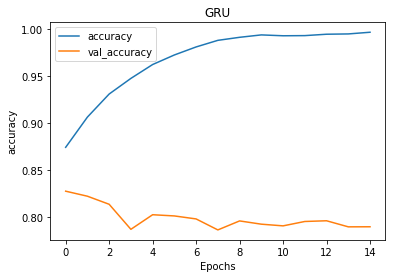

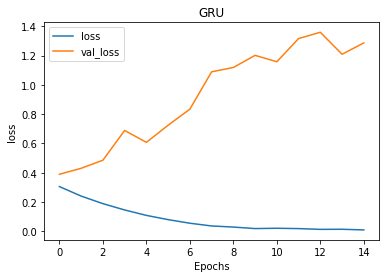

In [0]:
plot_graphs(gru_history, 'accuracy', 'GRU')
plot_graphs(gru_history, 'loss', 'GRU')

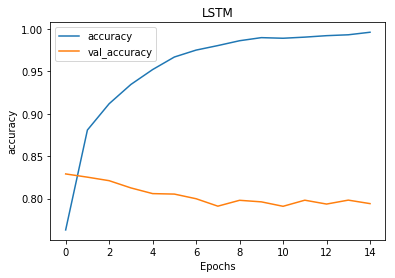

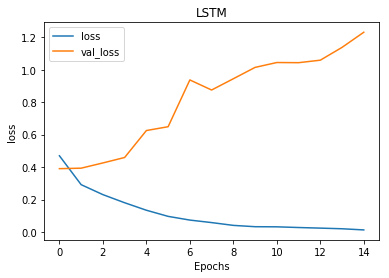

In [0]:
plot_graphs(lstm_history, 'accuracy', 'LSTM')
plot_graphs(lstm_history, 'loss', 'LSTM')

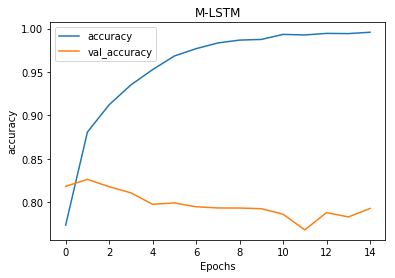

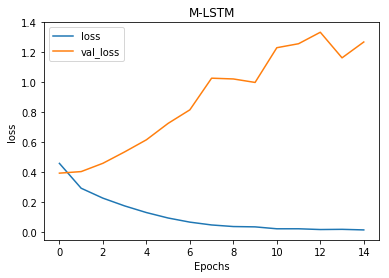

In [0]:
plot_graphs(mlstm_history, 'accuracy', 'M-LSTM')
plot_graphs(mlstm_history, 'loss', 'M-LSTM')

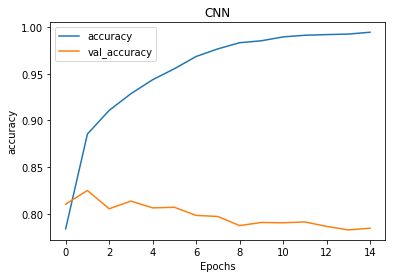

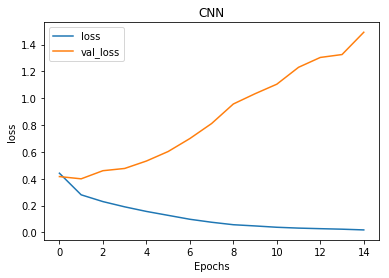

In [0]:
plot_graphs(cnn_history, 'accuracy', 'CNN')
plot_graphs(cnn_history, 'loss', 'CNN')

In [0]:
def plot_multi_graphs(history, string):
  for i, h in enumerate(history):
    plt.plot(h.history[string])
    plt.plot(h.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.figure(figsize=(20,10))
  plt.show()

histories = []
histories.append(gru_history)
histories.append(lstm_history)
histories.append(mlstm_history)
histories.append(cnn_history)


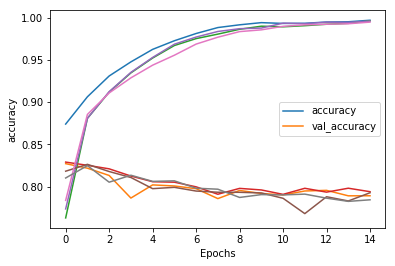

<Figure size 1440x720 with 0 Axes>

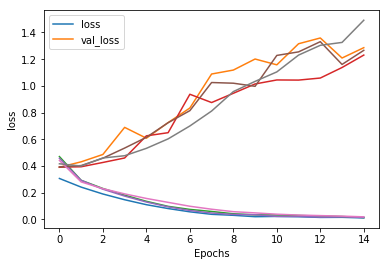

<Figure size 1440x720 with 0 Axes>

In [0]:
plot_multi_graphs(histories, 'accuracy')
plot_multi_graphs(histories, 'loss')